# Diferencijalna jednačina

Uvez neophodnih paketa

In [33]:
import numpy as np                  # Paket za numeričku matematiku
from scipy.integrate import odeint  # Paket za rešavanje diferencijalnih jednačina
import matplotlib.pyplot as plt     # Paket za iscrtavanje grafika   

Konstante:

In [34]:
M = 3.2e-2 # kg
c = 3e5    # N/m
A = 5e-5   # m2
P = 40e5   # N/m2
u = 1      # ?

Opis jednačine:
M*x'' + u*x' + c*x = F = A*P*sin(2*pi*t)

In [35]:
def jednacina(y, t):
    x, v = y
    dydt = [v, (A * P * np.sin(2 * np.pi * t) - u*v - c*x) / M]
    return dydt

Prametri jednačine:

In [36]:
# Početne vrednosti za put i brzinu (prvi izvod)
y0 = [0,  0]

# Vremenski interval i korak
T_pocetak = 0
T_kraj = 3
f_odabiranja = 10000
T_odabiranja = 1/f_odabiranja
t = np.arange(T_pocetak, T_kraj, T_odabiranja)

Rešavanje jednačine

In [37]:
# Vraća dva niza vrednosti, za x i prvi izvod
rezultat = odeint(jednacina, y0, t)

Iscrtavanje odziva

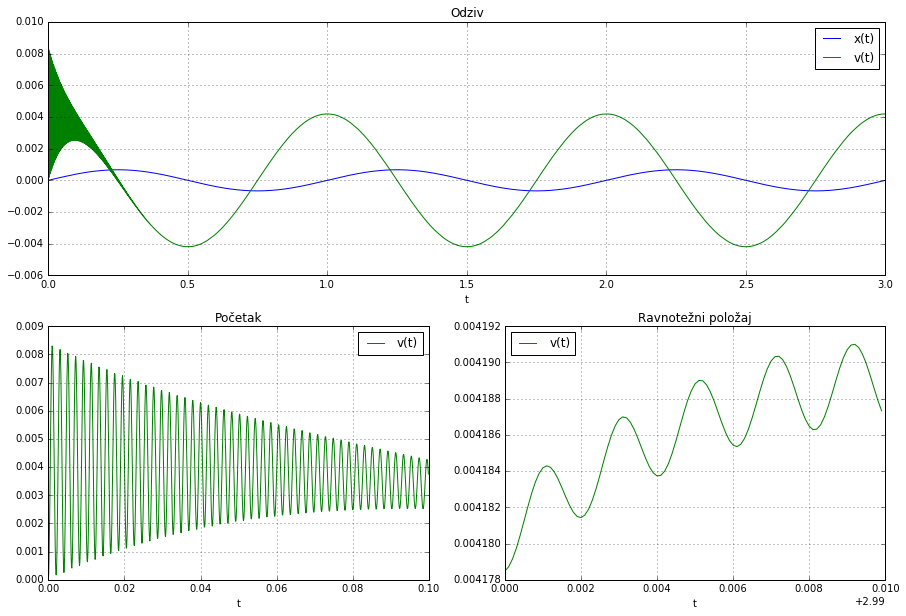

In [38]:
# Iscrtavanje grafika
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(t, rezultat[:, 0], 'b', label='x(t)')
plt.plot(t, rezultat[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Odziv')

# Iscrtavanje početka
plt.subplot(223)
t2 = t[t < 0.1] # koristi samo početne vremenske odbirke 
plt.plot(t2, rezultat[:len(t2), 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Početak')

# Iscrtavanje ravnotežnog položaja
plt.subplot(224)
t3 = t[t > t[-1] - 0.01] # koristi samo krajnje vremenske odbirke, tj. samo one blizu poslednjeg vremenskog odbirka - t[-1]
plt.plot(t3, rezultat[-len(t3):, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Ravnotežni položaj')

plt.show()

- Primecuje su oscilacije u brzini na pocetku
- Tokom vremena vibracije slabe, ali nikad ne prestaju

Dalje se racuna amplituda ove oscilaciju u ravnoteznom polozaju

-------------------

## Spektar brzine

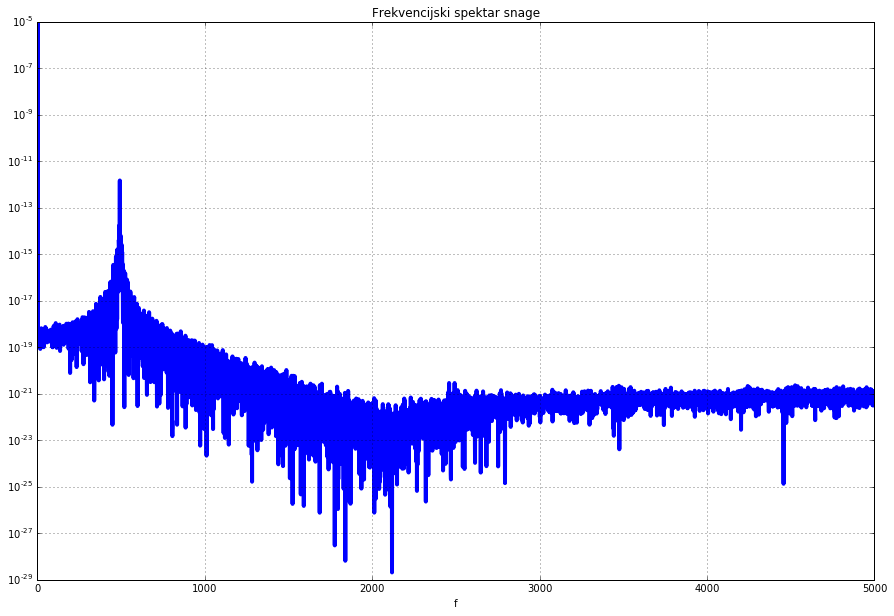

In [43]:
spektar = np.fft.fft(rezultat[-f_odabiranja:,1]) * T_odabiranja
freq = np.fft.fftfreq(f_odabiranja, d=T_odabiranja)
mask = freq >= 0
freq = freq[mask]
spektar_snage = spektar.real[mask]**2 * 2
plt.figure(figsize=(15,10))
plt.semilogy(freq, spektar_snage, linewidth=4)
plt.xlabel('f')
plt.title('Frekvencijski spektar snage')
plt.grid()
plt.show()

Izracunavanje frekvencija i amplituda sinusoida u brzini

In [40]:
# Nadji maksimume u spektru
sort = np.argsort(spektar_snage)[::-1]
maksimumi = [sort[0]]
for i in range(1, len(sort)):
    if np.abs(maksimumi[0] - sort[i]) > 10:
        maksimumi.append(sort[i])
        break

for i in range(len(maksimumi)):
    print('Frekvencija{0}={1}, Amplituda{0}={2}'.format(i+1, maksimumi[i], np.sqrt(spektar_snage[maksimumi[i]]*2)))

Frekvencija1=1, Amplituda1=0.004188808448910064
Frekvencija2=492, Amplituda2=1.7287602489373327e-06
